# Notebook to plot training progress of agent

It will obtain data from file stored in format like `bullet_racecar.cma.1.32.hist.json` and `.hist_best.json`, where format is `env_name.optimizer.num_rollouts.popsize.hist.json`.


In [2]:
import numpy as np
import json
import os
from visualisation import plot_reward_evolution

In [3]:
root = '/data/cvfs/ah2029/datasets/gym/carracing/'
env_name = 'carracing'
optimizer = 'cma'
num_rollouts = 1 # number of rollouts that are averaged over an episode

Model trained for 348 generations
Model evaluated 347 times


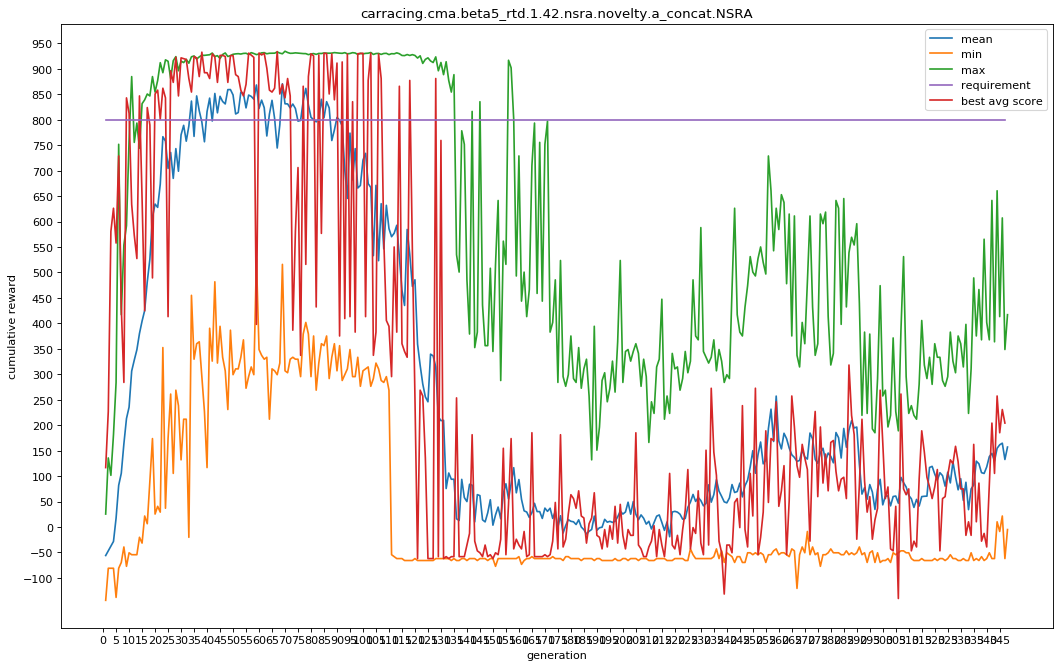

In [20]:
model_name = 'beta5_rtd'
num_rollouts = 1
popsize = 42
unique_id = 'nsra'
novelty_search = True
novelty_mode = 'a_concat'
ns_mode = 'NSRA'
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search, 
                      novelty_mode, ns_mode)

Model trained for 225 generations
Model evaluated 224 times


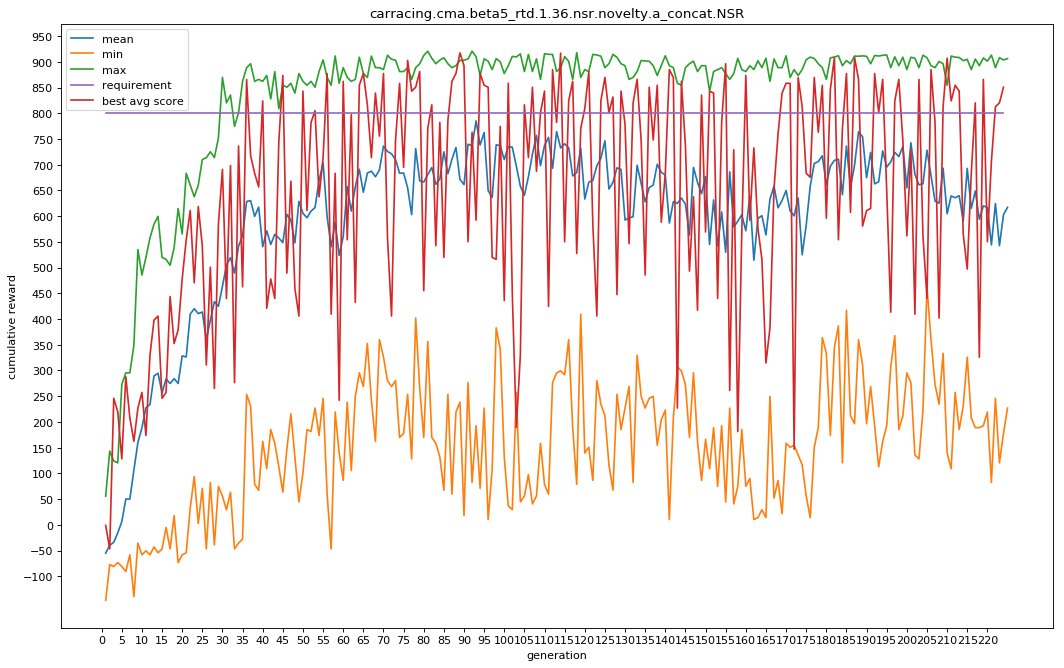

In [21]:
model_name = 'beta5_rtd'
num_rollouts = 1
popsize = 36
unique_id = 'nsr'
novelty_search = True
novelty_mode = 'a_concat'
ns_mode = 'NSR'
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search, 
                      novelty_mode, ns_mode)

Model trained for 808 generations
Model evaluated 161 times


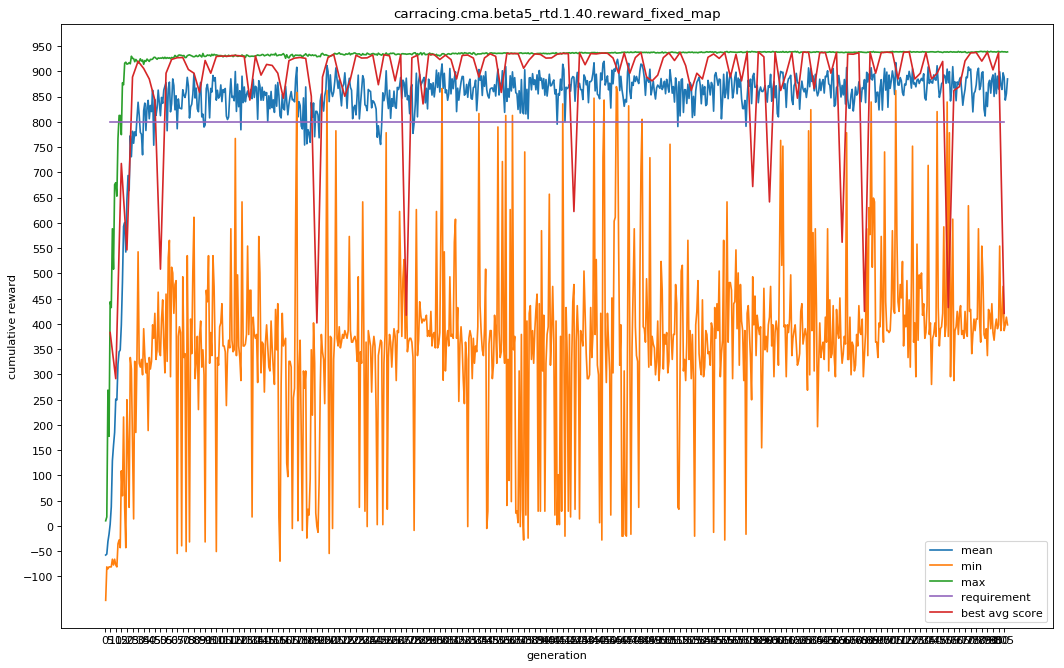

In [9]:
model_name = 'beta5_rtd'
num_rollouts = 1
popsize = 40
unique_id = 'reward_fixed_map'
novelty_search = False
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search)

Model trained for 69 generations
Model evaluated 13 times


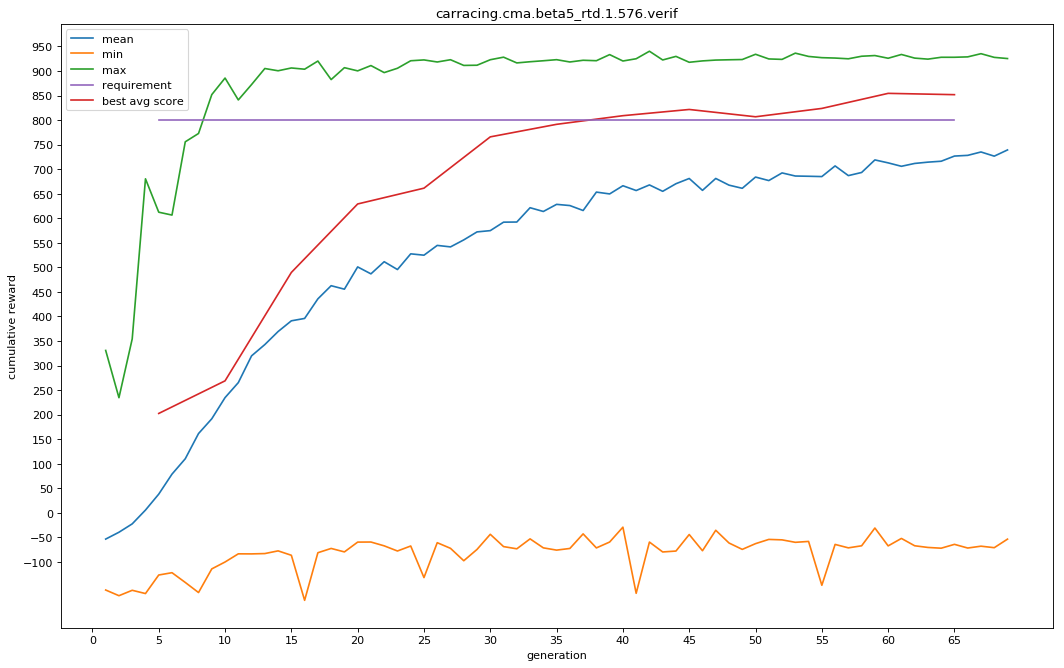

In [10]:
model_name = 'beta5_rtd'
popsize = 576
unique_id = 'verif'
novelty_search = False
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search)

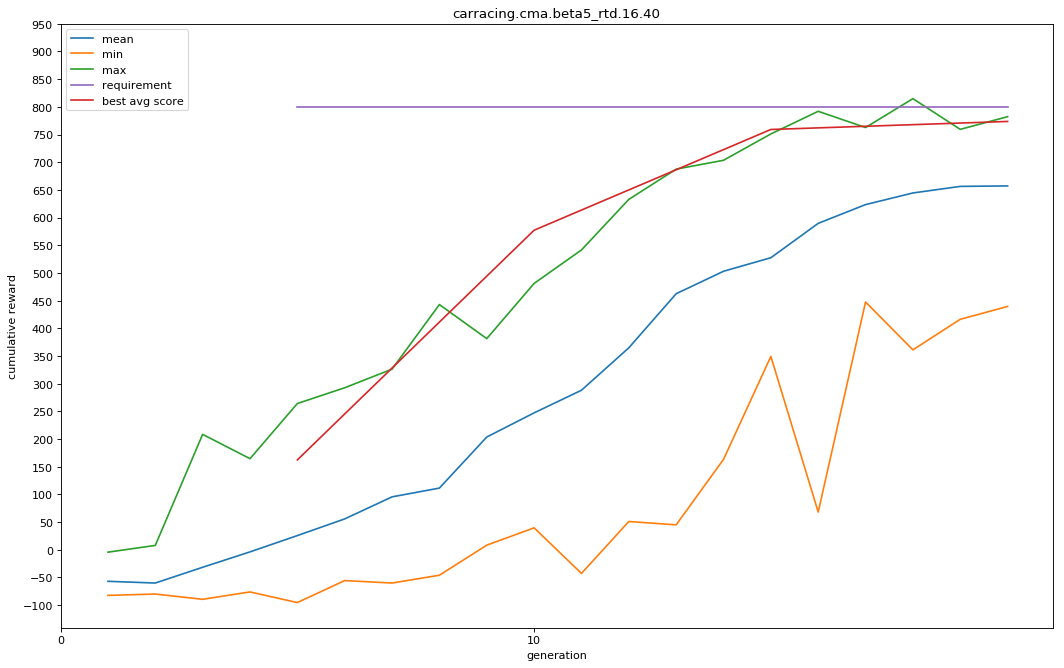

In [60]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 0], data[:, 2])
line_min, = plt.plot(data[:, 0], data[:, 3])
line_max, = plt.plot(data[:, 0], data[:, 4])
line_best, = plt.plot(best_data[:, 0], best_data[:, 2])
line_req, = plt.plot(best_data[:, 0], best_data[:, 4])
plt.legend([line_mean, line_min, line_max, line_req, line_best], ['mean', 'min', 'max', 'requirement', 'best avg score'])
plt.xlabel('generation')
plt.xticks(np.arange(0, len(data), 10))
plt.ylabel('cumulative reward')
plt.yticks(np.arange(-100, 1000, 50))
plt.title(file_base)
#plt.savefig(file_base+".svg")
plt.show()

Model trained for 36 generations
Model evaluated 7 times


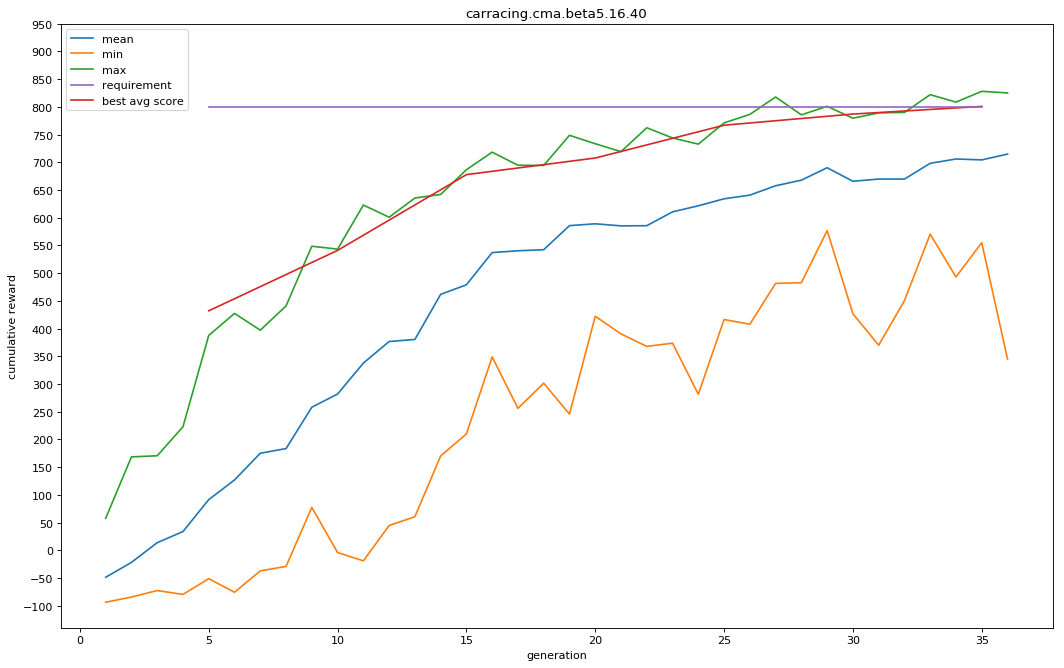

In [3]:
model_name = 'beta5'
num_rollouts = 16
popsize = 40
unique_id = ''
novelty_search = False
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search)

Model trained for 80 generations
Model evaluated 15 times


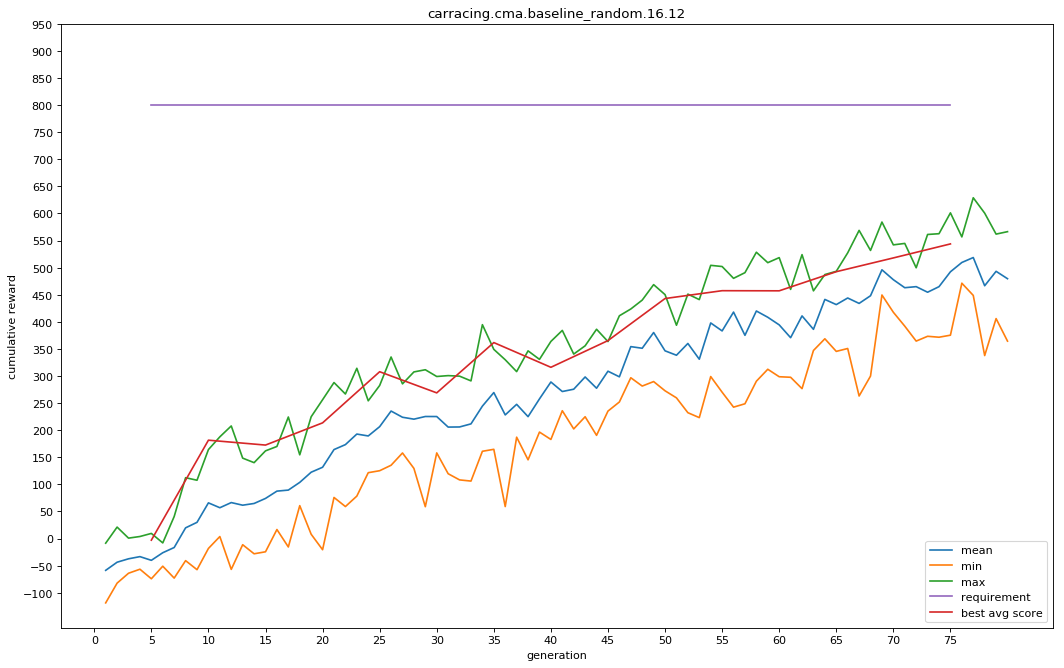

In [5]:
model_name = 'baseline_random'
num_rollouts = 16
popsize = 12
unique_id = ''
novelty_search = False
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search)

Model trained for 295 generations
Model evaluated 295 times


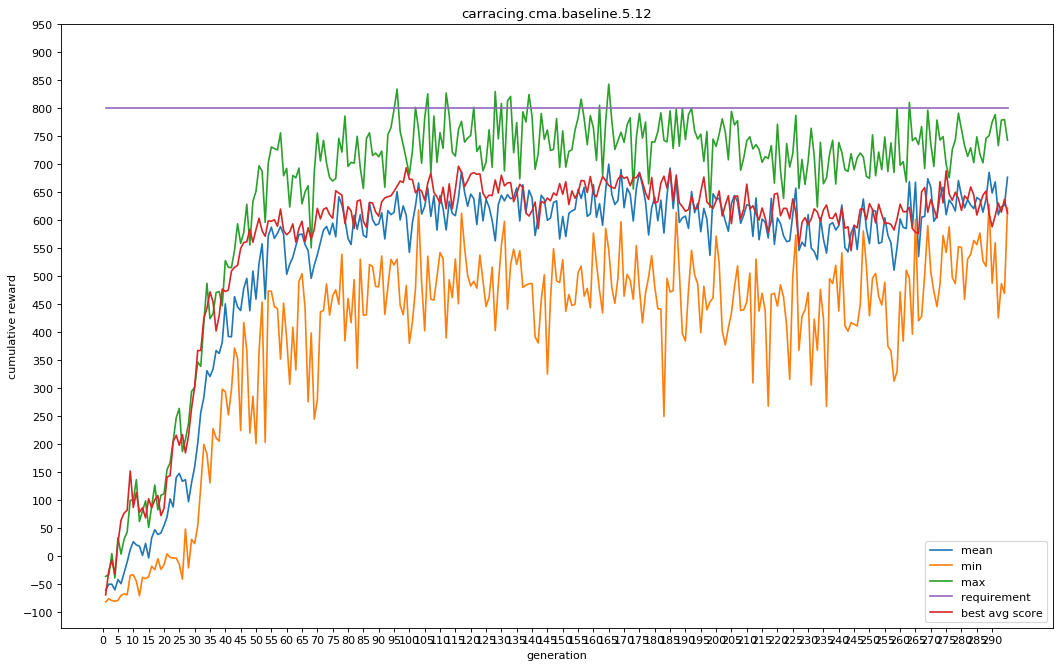

In [6]:
model_name = 'baseline'
num_rollouts = 5
popsize = 12
unique_id = ''
novelty_search = False
plot_reward_evolution(root, env_name, optimizer, model_name, num_rollouts, popsize, unique_id, novelty_search)